In [647]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [648]:
df = pd.read_csv("Arts.csv")
del df['Sr.No']

In [649]:
df.head()

,url,Painting name,Artist Name,Height,Width,Location,Artist_Region,Views,Favorites,Painting_PopularityIndex,...,Age of painting as on 8-Apr,Artist_artworks,Artist_followers,Artist_popularityIndex,Material,Number_materials,Pri12y_materials,Style,Number_styles,Pri12y_style
0,https://www.saatchiart.com/art/Painting-Cafe-J...,Cafe Jardin Painting by Shellie Garber,Shellie Garber,24.0,18.0,United States,North America,61,5,0.082,...,0,136,94,0.04,Paper,1,Paper,"Abstract, Abstract Expressionism, Fine Art",3,Abstract
1,https://www.saatchiart.com/art/Painting-Rose-T...,Rose Trellis Painting by Shellie Garber,Shellie Garber,14.0,11.0,United States,North America,117,9,0.077,...,13,136,94,0.04,Paper,1,Paper,"Abstract, Abstract Expressionism, Fine Art",3,Abstract
2,https://www.saatchiart.com/art/Painting-Deck-C...,Deck Chairs Series No7 Painting by Renata Fern...,Renata Fernandez,15.7,12.6,United Kingdom,Europe,89,13,0.146,...,48,52,173,0.07,"Canvas, Cardboard",2,Canvas,"Figurative, Fine Art, Realism",3,Figurative
3,https://www.saatchiart.com/art/Painting-At-the...,At the Beach,Dan Adams,8.0,10.0,United States,North America,0,0,0.000,...,84,91,224,0.09,Canvas,1,Canvas,"Expressionism, Figurative, Fine Art",3,Expressionism
4,https://www.saatchiart.com/art/Painting-not-hu...,not human... rave,yossi kotler,47.2,31.5,Israel,Asia,0,0,0.000,...,98,432,417,0.17,Canvas,1,Canvas,"Abstract Expressionism, Conceptual, Figurative...",5,Abstract Expressionism


In [650]:
df.corr()

,Height,Width,Views,Favorites,Painting_PopularityIndex,Price,Number of mediums,Size,Month,Day,Year,Date uploaded,Age of painting as on 8-Apr,Artist_artworks,Artist_followers,Artist_popularityIndex,Number_materials,Number_styles
Height,1.000000,0.773579,0.064189,0.099683,-0.018733,0.406651,0.040014,0.904715,0.015464,0.022029,-0.041519,-0.039862,0.039861,-0.097781,-0.032804,-0.033621,0.001382,0.054370
Width,0.773579,1.000000,0.058348,0.087687,-0.024627,0.459561,0.036727,0.895826,0.025506,0.011801,-0.054126,-0.052136,0.052135,-0.096922,-0.048732,-0.049374,0.041112,0.005247
Views,0.064189,0.058348,1.000000,0.704856,-0.236100,0.102892,-0.039679,0.048608,-0.095322,-0.118775,-0.120957,-0.132663,0.132662,0.092752,0.382970,0.382691,-0.029340,0.013623
Favorites,0.099683,0.087687,0.704856,1.000000,0.066176,0.118023,-0.001480,0.096490,-0.062589,-0.089418,-0.022094,-0.030013,0.030013,0.019972,0.273371,0.273608,-0.013125,0.040153
Painting_PopularityIndex,-0.018733,-0.024627,-0.236100,0.066176,1.000000,-0.024123,0.036801,-0.000698,0.164723,0.146284,0.106630,0.121582,-0.121581,-0.123293,-0.157220,-0.156442,0.058569,0.053977
Price,0.406651,0.459561,0.102892,0.118023,-0.024123,1.000000,-0.027806,0.453142,0.002176,-0.000289,-0.090801,-0.090356,0.090356,-0.045076,0.000802,0.000575,0.001109,0.028723
Number of mediums,0.040014,0.036727,-0.039679,-0.001480,0.036801,-0.027806,1.000000,0.028380,0.039249,0.042733,0.035288,0.038304,-0.038305,0.003690,-0.000007,0.000389,0.121849,0.092608
Size,0.904715,0.895826,0.048608,0.096490,-0.000698,0.453142,0.028380,1.000000,0.015637,0.011546,-0.045424,-0.043735,0.043734,-0.090355,-0.042867,-0.043473,0.018255,0.016790
Month,0.015464,0.025506,-0.095322,-0.062589,0.164723,0.002176,0.039249,0.015637,1.000000,0.612989,-0.028270,0.048764,-0.048767,0.029873,0.057687,0.057951,0.006876,0.120311
Day,0.022029,0.011801,-0.118775,-0.089418,0.146284,-0.000289,0.042733,0.011546,0.612989,1.000000,-0.013479,0.050203,-0.050205,0.012962,0.072607,0.072969,0.041831,0.134207


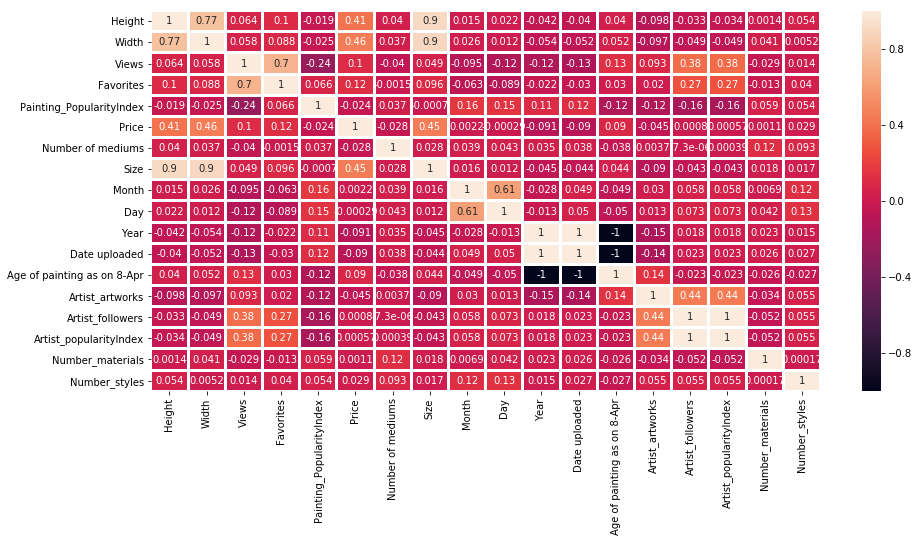

In [815]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidths=2)

In [813]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 31 columns):
url                            1232 non-null object
Painting name                  1232 non-null object
Artist Name                    1232 non-null object
Height                         1232 non-null float64
Width                          1232 non-null float64
Location                       1232 non-null object
Artist_Region                  1232 non-null object
Views                          1232 non-null int64
Favorites                      1232 non-null int64
Painting_PopularityIndex       1232 non-null float64
Price                          1232 non-null int64
Subject                        1232 non-null object
Medium                         1232 non-null object
Number of mediums              1232 non-null int64
Pri12y medium                  1232 non-null object
Published date                 1232 non-null object
Size                           1232 non-null float64
Month    

In [814]:
df.describe()

,Height,Width,Views,Favorites,Painting_PopularityIndex,Price,Number of mediums,Size,Month,Day,Year,Date uploaded,Age of painting as on 8-Apr,Artist_artworks,Artist_followers,Artist_popularityIndex,Number_materials,Number_styles
count,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000
mean,30.578003,30.693750,686.096591,18.426948,0.038084,2668.861201,1.612013,1165.598336,10.284903,25.895292,2013.668019,41814.708604,1018.293019,123.820617,202.211039,0.082654,1.094156,3.611201
std,16.734353,17.552971,900.332875,20.296011,0.036235,4385.483016,1.025484,1233.487752,3.172408,8.915594,3.419163,1249.755660,1249.754335,207.435025,340.211287,0.139844,0.370608,1.284402
min,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,9.000000,1.000000,1.000000,1974.000000,27394.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,18.000000,17.450000,131.000000,6.000000,0.016000,740.000000,1.000000,309.290000,10.000000,23.000000,2013.000000,41639.000000,464.000000,22.000000,13.000000,0.010000,1.000000,3.000000
50%,28.000000,27.800000,408.000000,13.000000,0.029000,1635.000000,1.000000,768.300000,12.000000,31.000000,2015.000000,42117.000000,716.000000,57.000000,57.000000,0.020000,1.000000,4.000000
75%,39.400000,39.400000,887.000000,24.000000,0.049000,3210.000000,2.000000,1552.360000,12.000000,31.000000,2015.000000,42369.000000,1194.000000,125.250000,233.000000,0.100000,1.000000,5.000000
max,200.000000,130.000000,9196.000000,242.000000,0.308000,106000.000000,5.000000,14000.000000,12.000000,31.000000,2017.000000,42835.000000,15439.000000,1974.000000,2435.000000,1.000000,5.000000,5.000000


In [738]:
X = df[[
       'Views', 'Favorites', 'Painting_PopularityIndex', 'Number of mediums', 'Size', 'Month', 'Day', 'Year',
       'Age of painting as on 8-Apr', 'Artist_artworks', 'Artist_followers',
       'Artist_popularityIndex', 'Number_materials',
       'Number_styles']]

X.head()

,Views,Favorites,Painting_PopularityIndex,Number of mediums,Size,Month,Day,Year,Age of painting as on 8-Apr,Artist_artworks,Artist_followers,Artist_popularityIndex,Number_materials,Number_styles
0,61,5,0.082,1,432.00,4,10,2017,0,136,94,0.04,1,3
1,117,9,0.077,1,154.00,12,26,2017,13,136,94,0.04,1,3
2,89,13,0.146,1,197.82,2,19,2017,48,52,173,0.07,2,3
3,0,0,0.000,1,80.00,1,14,2017,84,91,224,0.09,1,3
4,0,0,0.000,4,1486.80,12,31,2016,98,432,417,0.17,1,5


In [739]:
y = df['Price']

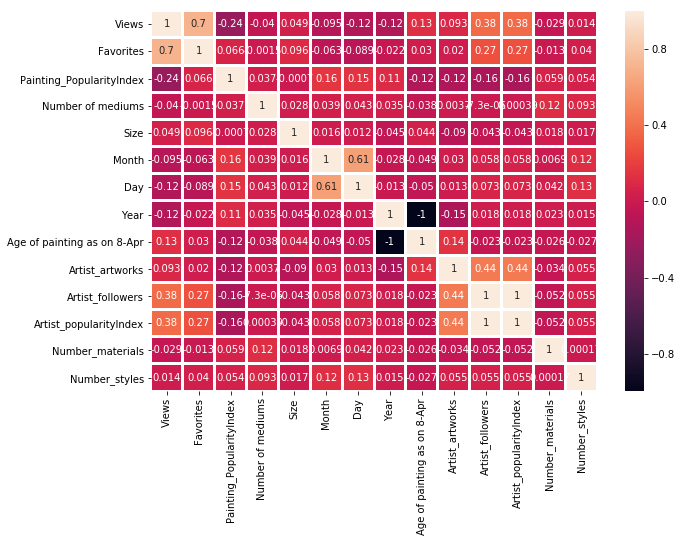

In [740]:
plt.figure(figsize=(10,7))
sns.heatmap(X.corr(),annot=True,linewidths=2)

In [741]:
from sklearn.cross_validation import train_test_split

In [950]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=800)

In [951]:
X_train

,Views,Favorites,Painting_PopularityIndex,Number of mediums,Size,Month,Day,Year,Age of painting as on 8-Apr,Artist_artworks,Artist_followers,Artist_popularityIndex,Number_materials,Number_styles
846,292,6,0.021,1,977.04,11,27,2014,863,4,1,0.00,1,3
307,547,17,0.031,5,1670.88,12,31,2015,464,175,322,0.13,1,5
948,56,6,0.107,1,512.00,12,31,2013,1194,61,15,0.01,1,5
504,0,0,0.000,1,761.76,12,30,2015,465,86,30,0.01,1,1
755,1352,33,0.024,3,139.24,12,31,2014,829,352,908,0.37,1,4
792,1761,11,0.006,1,1200.00,12,31,2014,829,67,372,0.15,1,3
459,203,14,0.069,1,108.00,12,31,2015,464,52,41,0.02,1,3
785,763,42,0.055,1,1253.16,12,31,2014,829,9,8,0.00,1,5
224,0,0,0.000,1,743.40,12,31,2015,464,225,165,0.07,1,3
875,591,29,0.049,3,1296.00,8,12,2014,970,37,48,0.02,2,4


In [952]:
print("Training feature set size:",X_train.shape)
print("Test feature set size:",X_test.shape)
print("Training variable set size:",y_train.shape)
print("Test variable set size:",y_test.shape)

Training feature set size: (739, 14)
Test feature set size: (493, 14)
Training variable set size: (739,)
Test variable set size: (493,)


In [953]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [954]:
lm = LinearRegression() # Creating a Linear Regression object 'lm'
#logModel = LogisticRegression(fit_intercept=True, n_jobs=1)

In [955]:
lm.fit(X_train,y_train) # Fit the linear model on to the 'lm' object itself i.e. no need to set this to another variable
#logModel.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [956]:
#predictions = logModel.predict(X_test)
#predictions[:5]

In [957]:
y_test

429       1640
912        560
476       2150
138       3650
196       1990
81         260
540       1240
387       2135
453       1340
862        940
887       6530
929        840
1136      2710
555        610
279       3000
780       1840
554       2084
281       1140
306       3527
282       1490
548        240
321       2950
436        410
121       1250
968       3150
379       1220
549        660
97         140
1143      7700
304       4710
         ...  
244       1990
521       1290
1063      1490
492     106000
807        875
371        750
1003      2850
770       3050
938       1340
207       3250
939        365
250       2190
736       2750
1190       740
153        495
744       1890
889       4030
914       2390
624        295
229       2750
833        470
1026       980
885       1340
55         599
1001      5410
632        590
595       8200
375       3350
485       5410
705        560
Name: Price, Length: 493, dtype: int64

In [958]:
print("The intercept term of the linear model:", lm.intercept_)

The intercept term of the linear model: -791398.132714


In [959]:
print("The coefficients of the linear model:", lm.coef_)

The coefficients of the linear model: [ -1.90436882e-01   1.68767081e+01  -3.32837954e+03  -1.64546909e+02
   1.66222464e+00   2.16474723e+01   1.23560016e+01   3.92485682e+02
   1.40218651e+00  -3.67562764e-01  -2.57369997e+01   6.35710736e+04
   1.22875517e+02  -5.12456877e+01]


In [960]:
lm.coef_

array([ -1.90436882e-01,   1.68767081e+01,  -3.32837954e+03,
        -1.64546909e+02,   1.66222464e+00,   2.16474723e+01,
         1.23560016e+01,   3.92485682e+02,   1.40218651e+00,
        -3.67562764e-01,  -2.57369997e+01,   6.35710736e+04,
         1.22875517e+02,  -5.12456877e+01])

In [961]:
#idict = {'Coefficients':lm.intercept_}
#idf = pd.DataFrame(data=idict,index=['Intercept'])
cdf = pd.DataFrame(data=lm.coef_, index=X_train.columns, columns=["Coefficients"])
#cdf=pd.concat([cdf,idf], axis=0)
cdf

,Coefficients
Views,-0.190437
Favorites,16.876708
Painting_PopularityIndex,-3328.379537
Number of mediums,-164.546909
Size,1.662225
Month,21.647472
Day,12.356002
Year,392.485682
Age of painting as on 8-Apr,1.402187
Artist_artworks,-0.367563


In [962]:
n=X_train.shape[0]
k=X_train.shape[1]
dfN = n-k
train_pred=lm.predict(X_train)
train_error = np.square(train_pred - y_train)
sum_error=np.sum(train_error)
se=np.zeros(X.columns.size)
for i in range(k):
    r = (sum_error/dfN)
    r = r/np.sum(np.square(X_train[list(X_train.columns)[i]]-X_train[list(X_train.columns)[i]].mean()))
    se[i]=np.sqrt(r)
cdf['Standard Error']=se
cdf['t-statistic']=cdf['Coefficients']/cdf['Standard Error']
cdf

,Coefficients,Standard Error,t-statistic
Views,-0.190437,0.109899,-1.732829
Favorites,16.876708,4.518007,3.735432
Painting_PopularityIndex,-3328.379537,2661.469600,-1.250580
Number of mediums,-164.546909,89.462363,-1.839286
Size,1.662225,0.078344,21.217116
Month,21.647472,28.499185,0.759582
Day,12.356002,10.575541,1.168356
Year,392.485682,26.982475,14.545948
Age of painting as on 8-Apr,1.402187,0.074003,18.947711
Artist_artworks,-0.367563,0.423134,-0.868668


In [963]:
print("Therefore, features arranged in the order of importance for predicting the price\n",'-'*90,sep='')
l=list(cdf.sort_values('t-statistic',ascending=False).index)
print(' > \n'.join(l))

Therefore, features arranged in the order of importance for predicting the price
------------------------------------------------------------------------------------------
Artist_popularityIndex > 
Size > 
Age of painting as on 8-Apr > 
Year > 
Favorites > 
Day > 
Month > 
Number_materials > 
Number_styles > 
Artist_artworks > 
Painting_PopularityIndex > 
Views > 
Number of mediums > 
Artist_followers


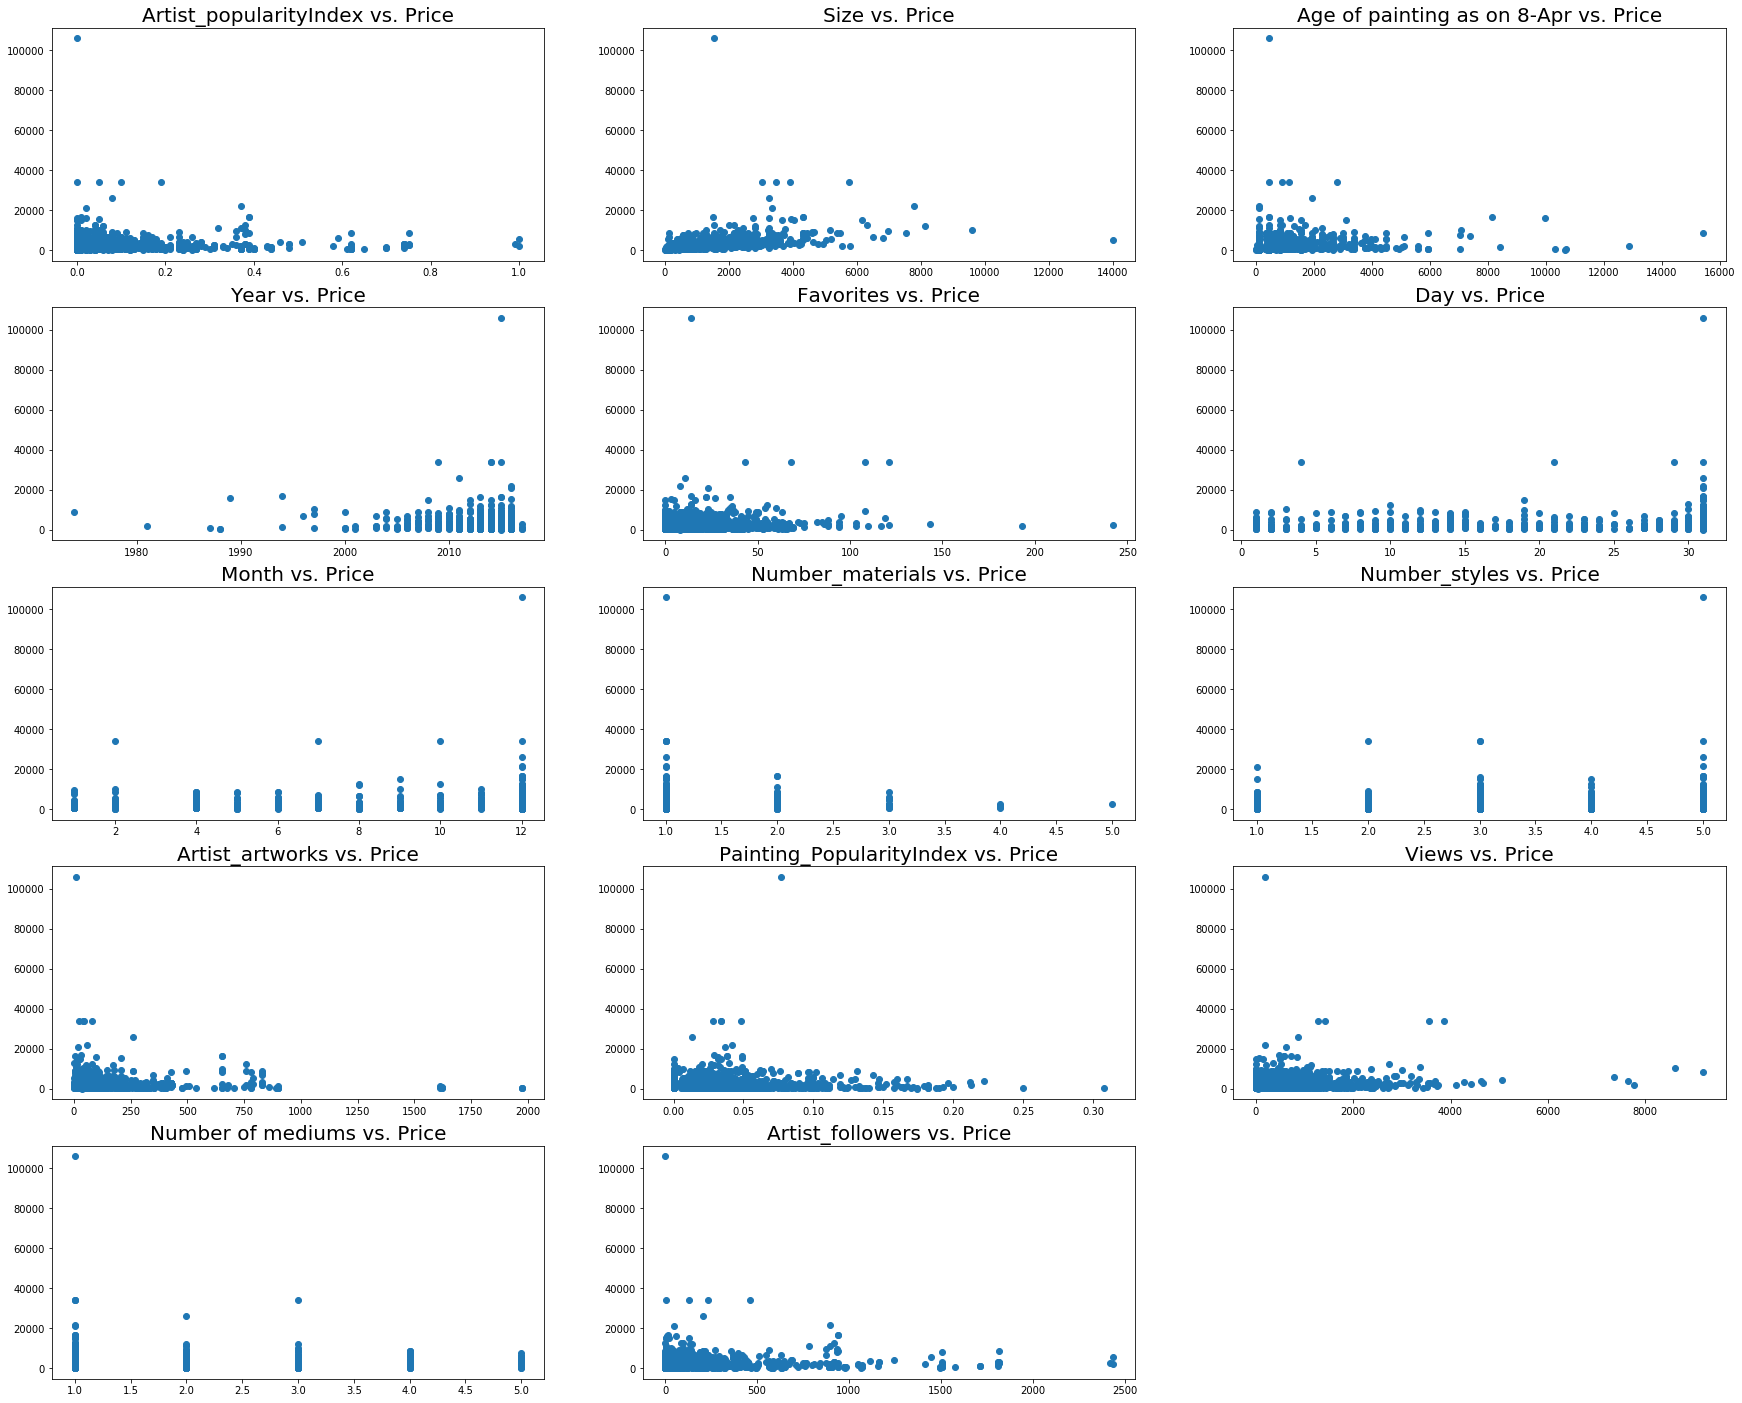

In [964]:
from matplotlib import gridspec
fig = plt.figure(figsize=(30, 30))
gs = gridspec.GridSpec(6,3)
#f, ax = plt.subplots(nrows=1,ncols=len(l), sharey=True)
index = 0
for value in l:
    if(value!="Intercept"):
        ax = plt.subplot(gs[index])
        ax.scatter(df[value],df['Price'])
        ax.set_title(value+" vs. Price", fontdict={'fontsize':20})
        index=index+1

In [965]:
print("R-squared value of this fit:", round(metrics.r2_score(y_train,train_pred),3))

R-squared value of this fit: 0.417


In [966]:
predictions = logModel.predict(X_test)
print ("Type of the predicted object:", type(predictions))
print ("Size of the predicted object:", predictions.shape)

Type of the predicted object: <class 'numpy.ndarray'>
Size of the predicted object: (493,)


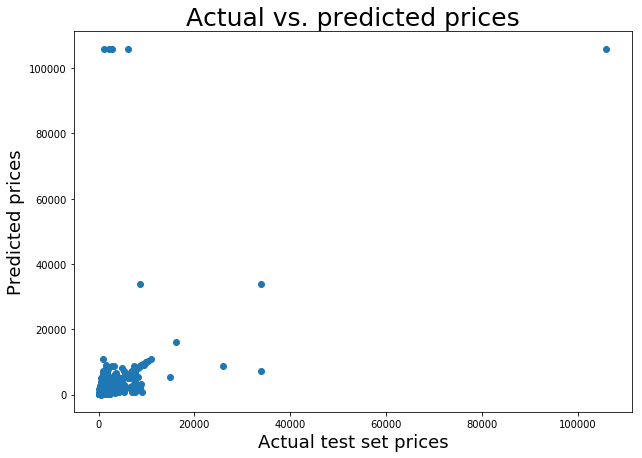

In [967]:
plt.figure(figsize=(10,7))
plt.title("Actual vs. predicted prices",fontsize=25)
plt.xlabel("Actual test set prices",fontsize=18)
plt.ylabel("Predicted prices", fontsize=18)
plt.scatter(x=y_test,y=predictions)

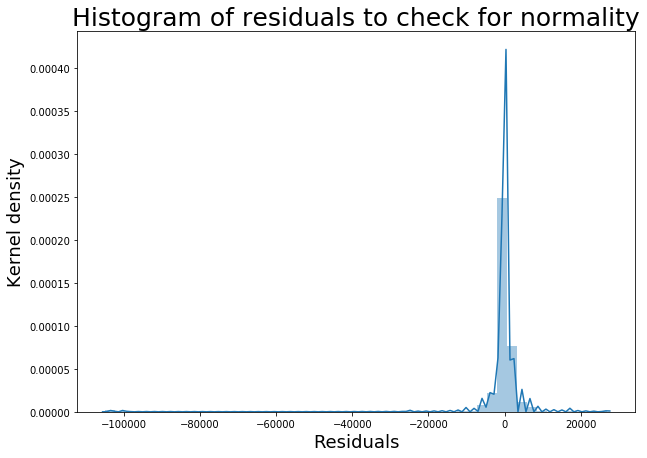

In [968]:
plt.figure(figsize=(10,7))
plt.title("Histogram of residuals to check for normality",fontsize=25)
plt.xlabel("Residuals",fontsize=18)
plt.ylabel("Kernel density", fontsize=18)
sns.distplot([y_test-predictions])

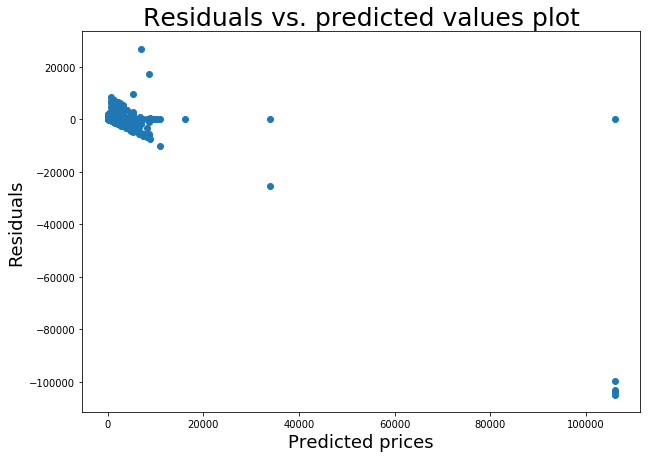

In [969]:
plt.figure(figsize=(10,7))
plt.title("Residuals vs. predicted values plot",fontsize=25)
plt.xlabel("Predicted prices",fontsize=18)
plt.ylabel("Residuals", fontsize=18)
plt.scatter(x=predictions,y=y_test-predictions)

In [970]:
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions)))

Mean absolute error (MAE): 2079.27383367
Mean square error (MSE): 93169225.5091
Root mean square error (RMSE): 9652.42070722


In [971]:
#print("R-squared value of predictions:",round(metrics.r2_score(y_test,predictions),3))
print("R-squared value of this fit:", round(metrics.r2_score(y_train,train_pred),3))

R-squared value of this fit: 0.417
